In [1]:
import sys
sys.path.append('/home/max.lalleman/CBC_Stoch_Search/gwtc3-spin-studies/figures/')

import arviz as az
import jax.numpy as jnp
import matplotlib.pylab as plt
import numpy as np
from scipy.special import erf

from astropy.cosmology import Planck15
import astropy.units as u
from makeCorner import *

az.rcParams["plot.max_subplots"] = 80
os.environ["HDF5_USE_FILE_LOCKING"] = "FALSE"

logit_std = 2.5
tmp_max = 100.
tmp_min = 2.

In [8]:
cdf_file = "./cdf_files/GWB_O3.cdf"
cdf_file_power_law = "../Varying_Power_Law_Sigmoid/cdf_files/Power_Law_CBC_O3_Normal_0_7_prior_delta_mMax.cdf"
data_no_GWV = "./cdf_files/CBC_O3.cdf"
cdf_file_below = "./cdf_files/Test_O5_below_sens.cdf"

In [9]:
data = az.from_netcdf(cdf_file)
data_power_law = az.from_netcdf(cdf_file_power_law)
# data_below = az.from_netcdf(cdf_file_below)
# az.summary(data)

In [10]:
samps = data.posterior.stack(draws=("chain", "draw"))
# samps_undet = data_below.posterior.stack(draws=("chain", "draw"))
samps_power_law = data_power_law.posterior.stack(draws=("chain", "draw"))

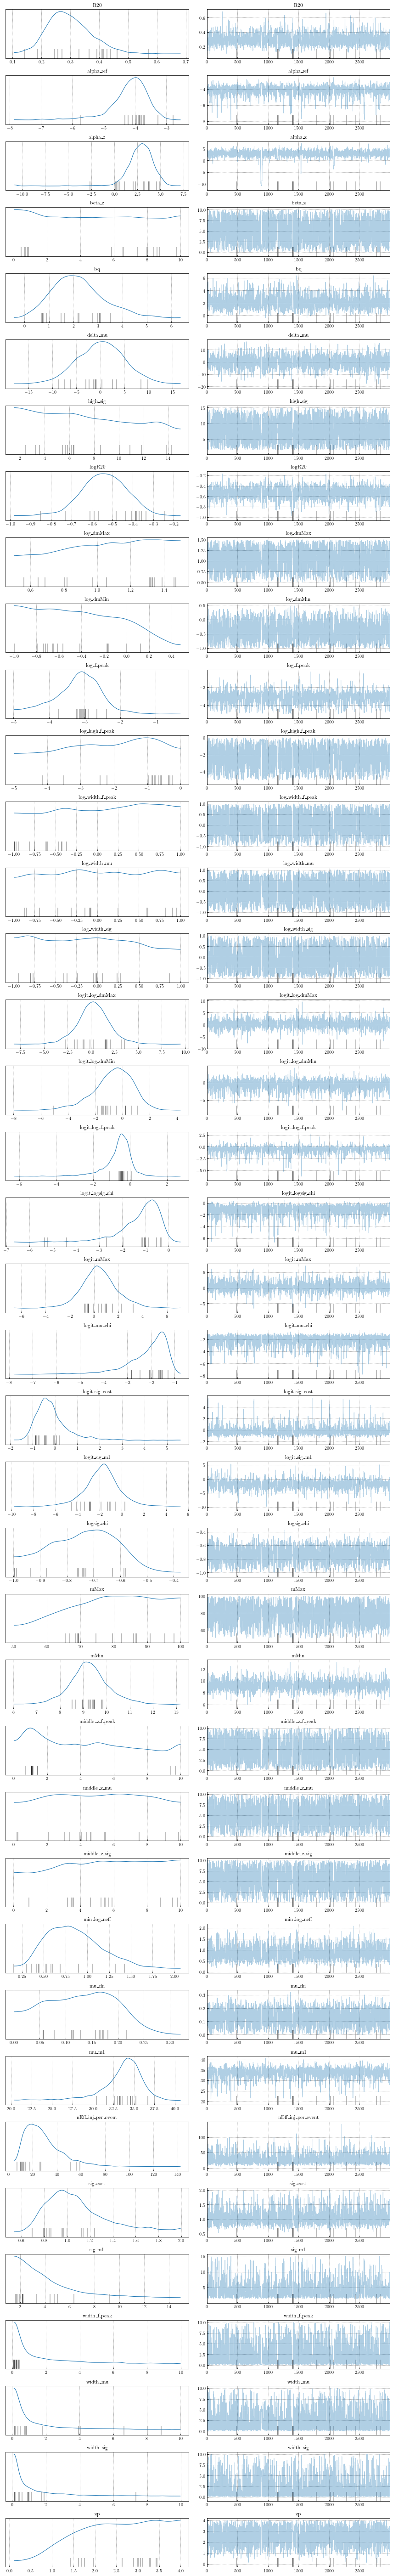

In [6]:
az.plot_trace(data_no_GWB, compact=True)
plt.tight_layout()
plt.show()

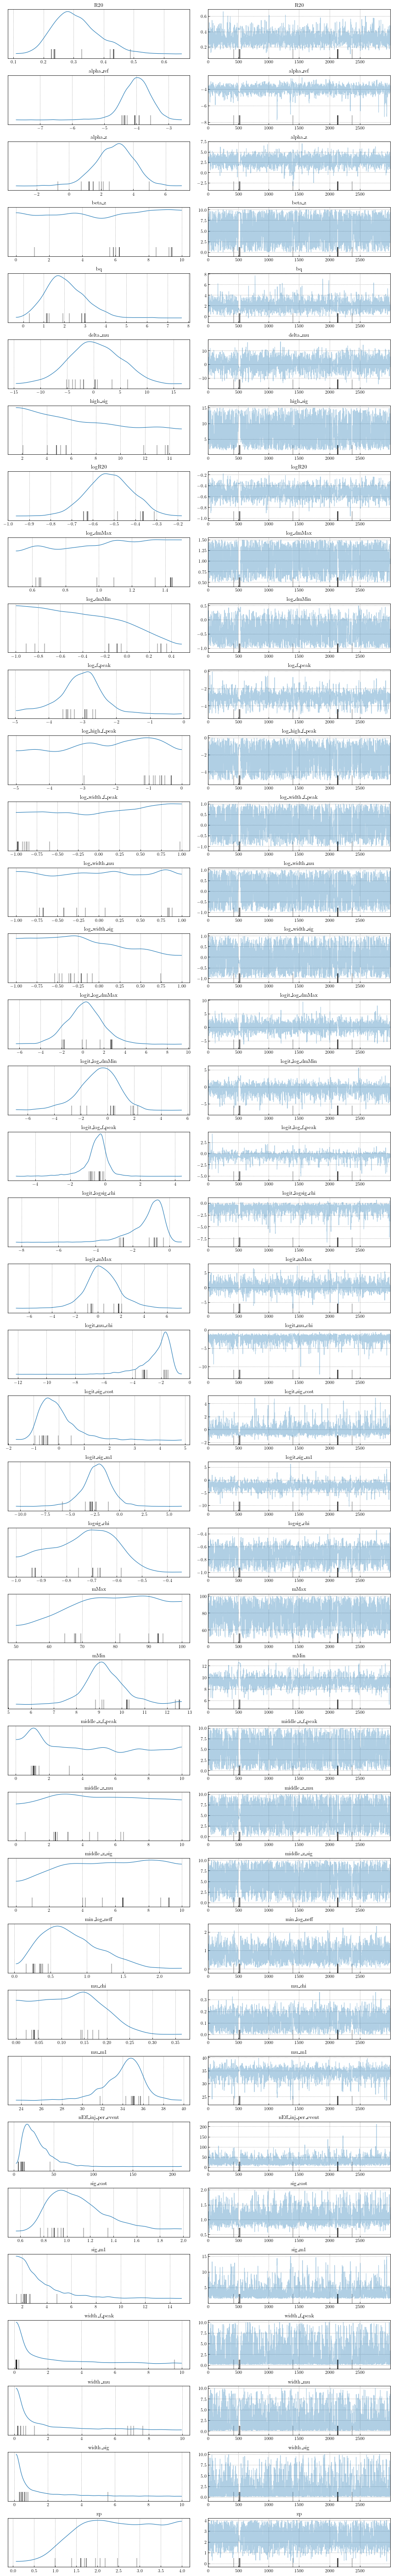

In [5]:
az.plot_trace(data, compact=True)
plt.tight_layout()
plt.show()

In [11]:
import numpyro.distributions as dist
new_priors = {
    "logR20":dist.Uniform(-2,1),
    "alpha_ref":dist.Normal(-2,3),
    "mu_m1":dist.Uniform(20,50),
    "mMin":dist.Uniform(5,15),
    "bq":dist.Normal(0,3),
    "alpha_z":dist.Normal(0,4),
    "beta_z":dist.Uniform(0,10),
    "zp": dist.Uniform(0,4),
    "fpeak": dist.Uniform(-5,0),
    "log_high_f_peak": dist.Uniform(-5,0),
    "width_f_peak": dist.Uniform(-1,1),
    "middle_z_f_peak": dist.Uniform(0,10),
    "delta_mu": dist.Normal(0, 5),
    "width_mu": dist.Uniform(-1,1),
    "middle_z_mu": dist.Uniform(0,10),
    "sig_m1": dist.Uniform(1.5,15),
    "high_sig": dist.Uniform(1.5,15),
    "width_sig": dist.Uniform(-1,1),
    "middle_z_sig": dist.Uniform(0,10),
}

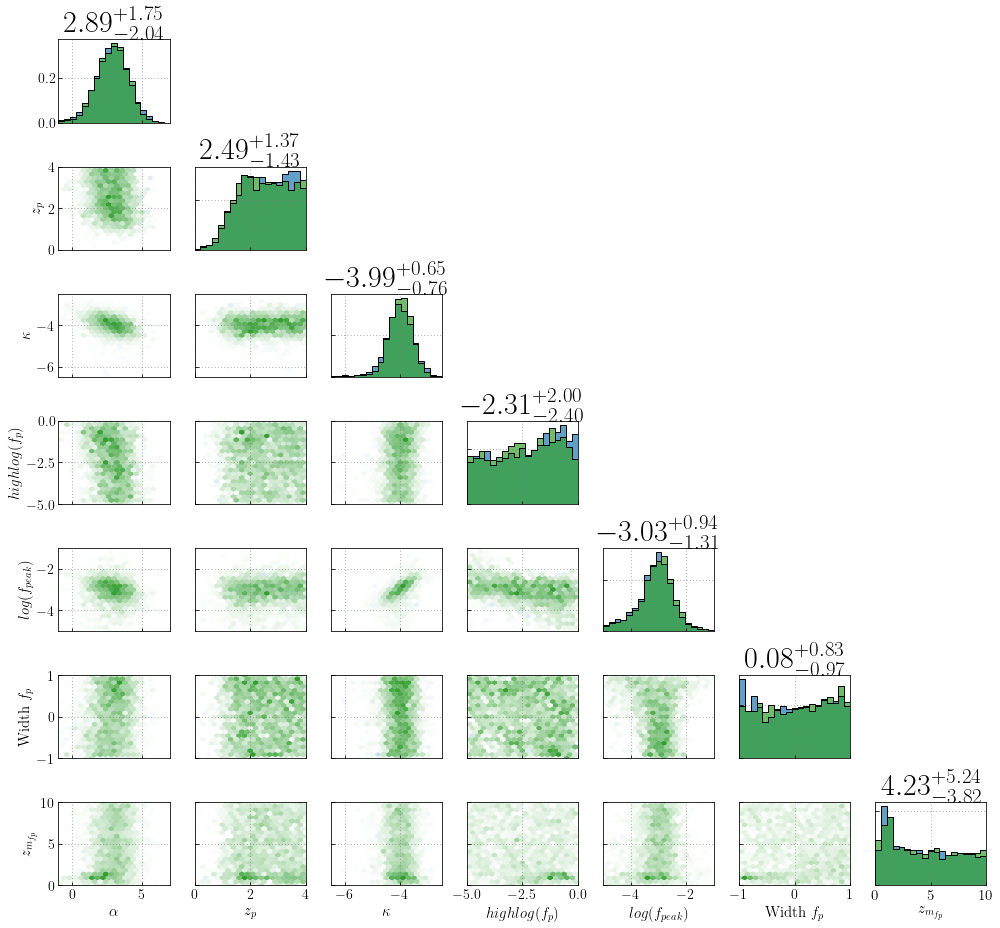

In [13]:
fig = plt.figure(figsize=(14,13))

stacked_samples = data.posterior.stack(draws=("chain", "draw"))
toPlot = {
    # "bq":{"data":stacked_samples.bq,"plot_bounds":(-2,2),"label":r"$\beta_q$"},
    # "logR20":{"data":stacked_samples.logR20,"plot_bounds":(-1.2,0),"label":r"$\log R_{0}$"},
    "alpha_z":{"data":stacked_samples.alpha_z,"plot_bounds":(-1,7),"label":r"$\alpha$"},
    "zp":{"data":stacked_samples.zp,"plot_bounds":(0,4),"label":r"$z_p$"},
    "alpha_ref":{"data":stacked_samples.alpha_ref,"plot_bounds":(-6.5,-2.5),"label":r"$\kappa$"},
    "log_high_f_peak":{"data":stacked_samples.log_high_f_peak,"plot_bounds":(-5,0),"label":r"$high log(f_{p})$"},
    "fpeak":{"data":stacked_samples.log_f_peak,"plot_bounds":(-5,-1),"label":r"$log(f_{peak})$"},
    "width_f_peak":{"data":stacked_samples.log_width_f_peak,"plot_bounds":(-1,1),"label":r"Width $f_p$"},
    "middle_z_f_peak":{"data":stacked_samples.middle_z_f_peak,"plot_bounds":(0,10),"label":r"$z_{m_{f_p}}$"},
}

stacked_samples_pl = data_power_law.posterior.stack(draws=("chain", "draw"))
toPlot_pl = {
    #"bq":{"data":stacked_samples.bq,"plot_bounds":(-2,2),"label":r"$\beta_q$"},
    #"logR20":{"data":stacked_samples_no_GWB.logR20,"plot_bounds":(-1.2,0),"label":r"$\log R_{0}$"},
    "alpha_z":{"data":stacked_samples_pl.alpha_z,"plot_bounds":(-1,7),"label":r"$\alpha$"},
    "zp":{"data":stacked_samples_pl.zp,"plot_bounds":(0,4),"label":r"$z_p$"},
    "alpha_ref":{"data":stacked_samples_pl.alpha_ref,"plot_bounds":(-6.5,-2.5),"label":r"$\kappa_{0}$"},
    "log_high_f_peak":{"data":stacked_samples_pl.log_high_f_peak,"plot_bounds":(-5,0),"label":r"$high log(f_{p})$"},
    "fpeak":{"data":stacked_samples_pl.log_f_peak,"plot_bounds":(-5,-1),"label":r"$log(f_{peak})$"},
    "width_f_peak":{"data":stacked_samples_pl.log_width_f_peak,"plot_bounds":(-1,1),"label":r"Width $f_p$"},
    "middle_z_f_peak":{"data":stacked_samples_pl.middle_z_f_peak,"plot_bounds":(0,10),"label":r"$z_{m_{f_p}}$"},
}

plot_corner_2(fig,toPlot_pl,toPlot,'#1f78b4','#33a02c',labelsize=15)
plt.savefig("HDPosterior_together_all.png", dpi=500, bbox_inches='tight')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.tight_layout()
plt.show()